## MACHINE LEARNING - LINEAR AND LOGISTIC REGRESSION

In [5]:
#importing all libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
import seaborn as sns
import statistics
import math
import sklearn.linear_model as sk
import sklearn.metrics as metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix
import matplotlib
from sklearn.linear_model import LogisticRegression

In [6]:
#Reading the data
runtime = pd.read_csv("sgemm_product.csv")
runtime.head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97
7,16,16,16,8,8,8,8,2,1,1,0,1,1,1,93.13,94.30,96.19,94.43
8,16,16,16,8,8,8,8,2,1,1,1,0,0,0,117.38,116.95,124.15,117.83
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19


In [7]:
#Checking null values:
runtime.isnull().sum().sum()

0

In [8]:
#Showing correlation of all the independent variable
runtime1 =runtime.iloc[:,1:14]
corr = runtime1.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
NWG,1,0.0093,-0.0086,0.11,0.015,0.16,8.6e-19,-0.00084,0.35,6.9e-21,1.4e-21,0,0
KWG,0.0093,1,0.15,0.15,-0.035,-0.035,-1.8e-19,-0.012,-0.012,1.9e-21,0,0,0
MDIMC,-0.0086,0.15,1,-0.21,0.2,0.085,-3.2e-18,-0.13,0.011,-1.1e-20,-3.7e-21,0,0
NDIMC,0.11,0.15,-0.21,1,0.085,0.2,-5.3e-18,0.011,-0.13,-1.1e-20,-3.7e-21,0,0
MDIMA,0.015,-0.035,0.2,0.085,1,0.088,-4.6e-18,-0.2,-0.019,1.6e-21,1.6e-21,0,0
NDIMB,0.16,-0.035,0.085,0.2,0.088,1,-1.1e-17,-0.019,-0.2,1.6e-21,1.6e-21,0,0
KWI,8.6e-19,-1.8e-19,-3.2e-18,-5.3e-18,-4.6e-18,-1.1e-17,1,-3.6e-16,-4.8e-16,0,0,0,0
VWM,-0.00084,-0.012,-0.13,0.011,-0.2,-0.019,-3.6e-16,1,0.0012,-1.4e-20,9.4e-22,0,0
VWN,0.35,-0.012,0.011,-0.13,-0.019,-0.2,-4.8e-16,0.0012,1,-1.4e-20,9.4e-22,0,0
STRM,6.9e-21,1.9e-21,-1.1e-20,-1.1e-20,1.6e-21,1.6e-21,0,-1.4e-20,-1.4e-20,1,0,0,0


In [9]:
#Normalizing the data
def norm(dataset):
    scaler = StandardScaler()
    newd =scaler.fit_transform(dataset)
    return newd

In [10]:
runtime_n=runtime

In [11]:
#Creating a matrix of all the independent variables
xd = np.array(runtime_n)
x=xd[:,0:14]
x.shape
x=pd.DataFrame(x)
test=pd.DataFrame(x)
x["constant"]=1
x=np.array(x)
x.shape

(241600, 15)

In [12]:
#Generating a random matrix
def theta_gen(x):
    theta = np.random.rand(x.shape[1],1)
    return theta[0:,]

In [13]:
theta = theta_gen(x)

In [14]:
#Creating a column which is the average of all the four runtimes
runtime["runavg (ms)"] = (runtime["Run1 (ms)"]+runtime["Run2 (ms)"]+runtime["Run3 (ms)"]+runtime["Run4 (ms)"])/4
runtime.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),runavg (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


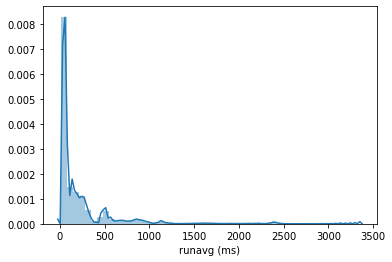

In [15]:
sns.distplot(runtime["runavg (ms)"] )

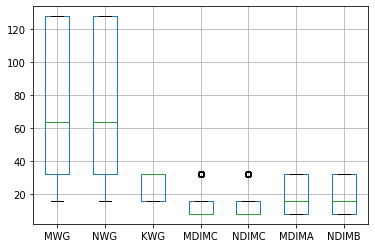

In [16]:
#Boxplot showing the range of variables
runtime2 = runtime.iloc[:,0:7]
runtime2.plot.box(grid='True')

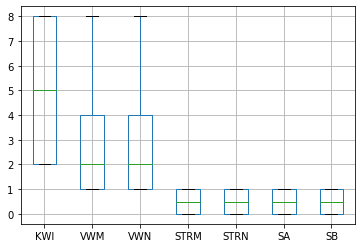

In [17]:
runtime2 = runtime.iloc[:,7:14]
runtime2.plot.box(grid='True')

In [18]:
runtime.describe

<bound method NDFrame.describe of         MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0        16   16   16      8      8      8      8    2    1    1     0     0   
1        16   16   16      8      8      8      8    2    1    1     0     0   
2        16   16   16      8      8      8      8    2    1    1     0     0   
3        16   16   16      8      8      8      8    2    1    1     0     0   
4        16   16   16      8      8      8      8    2    1    1     0     1   
...     ...  ...  ...    ...    ...    ...    ...  ...  ...  ...   ...   ...   
241595  128  128   32     32     32     32     32    8    4    4     1     0   
241596  128  128   32     32     32     32     32    8    4    4     1     1   
241597  128  128   32     32     32     32     32    8    4    4     1     1   
241598  128  128   32     32     32     32     32    8    4    4     1     1   
241599  128  128   32     32     32     32     32    8    4    4     1     1   

     

In [19]:
#Value to be predicted is run, keeping it in a matrix
runs = runtime["runavg (ms)"]/1000
run=np.array(runs).reshape([-1,1])
run.shape

(241600, 1)

In [20]:
runs

0         0.116370
1         0.078705
2         0.080565
3         0.086638
4         0.118663
            ...   
241595    0.017818
241596    0.036035
241597    0.035160
241598    0.028453
241599    0.017818
Name: runavg (ms), Length: 241600, dtype: float64

# Linear Regression

In [18]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(x, run, train_size=0.70,test_size=0.30, random_state=100)

In [19]:
theta = theta_gen(X_train)

In [20]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [21]:
X_test.shape

(72480, 15)

In [54]:
#Setting up the Cost function
#Here x is the independent variable, y is the dependent variable and theta is the randomly generated numbers

def Cost(x,y,theta):
    m=len(runtime.axes[0])
    the1 = np.matmul(x,theta)
    Cost1=sum(np.subtract((the1),y)**2)
    Cost=Cost1/(2*m)
    return(Cost)  

In [55]:
#Implementing gradient Descent function
def gradesc(x,y,theta,alpha,total):
    m=len(runtime.axes[0])
    xt = x.transpose()
    j=[0]*total
    for i in range(total):
        the2 =np.subtract((np.matmul(x,theta)),y)       
        the3=np.matmul(x.transpose(),the2)
        theta = np.subtract(theta , alpha*(1/m)*the3)
        theta0=theta[-1]
        j[i] = Cost(x,y,theta)
    finalj=(theta, j)
    return(finalj)

In [406]:
alpha = .001 
total =3000
finalj = gradesc(X_train, y_train, theta, alpha, total)

In [407]:
theta=finalj[0]
cost=finalj[1]

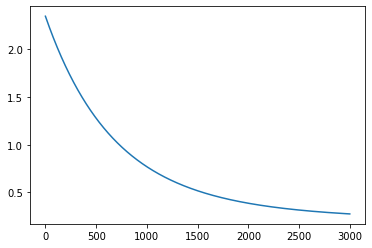

In [408]:
plt.plot(cost) # 0.33

In [409]:
cost[2999]

array([0.27528326])

In [37]:
#Linear Reg inbuilt func output
pred = sm.OLS(y_train, X_train)
pred2 = pred.fit()
print(pred2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     8287.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:47:40   Log-Likelihood:            -1.9621e+05
No. Observations:              169120   AIC:                         3.924e+05
Df Residuals:                  169105   BIC:                         3.926e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3819      0.002    182.493      0.0

In [455]:
#Predicting run time values using theta from gradient descent function
def predict_f(X_test, theta):
    predicted_val = X_test.dot(theta);
    return predicted_val;

In [411]:
#calculating predicted values
ypred=predict_f(X_test,theta)

In [412]:
#RMSE calculated using inbuilt function and inbuilt values of reg
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = y_pred-y_test
math.sqrt(sum(error*error)/len(error))

0.7688947566917249

In [453]:
#Finding all the regression metrics
def regression_results(y_test, ypred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred) 
    mse=metrics.mean_squared_error(y_test, ypred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [414]:
regression_results(y_test, ypred)

explained_variance:  0.2092
r2:  0.2092
MAE:  0.5683
MSE:  0.7908
RMSE:  0.8893


In [415]:
xx = np.matmul(X_train,theta)
regression_results(y_train, xx)

explained_variance:  0.2135
r2:  0.2135
MAE:  0.5654
MSE:  0.7865
RMSE:  0.8869


C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


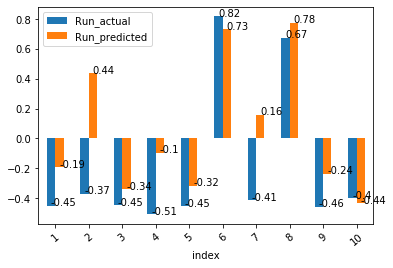

In [677]:
#Plotting y_hat and y_pred
y_data_lin = np.concatenate((y_test, ypred), axis=1)
y_data_lin = pd.DataFrame(y_data_lin)
y_data_lin.columns = ["Run_actual","Run_predicted"]
y_data_lin_plot = y_data_lin.head(10)
y_data_lin_plot["index"] = range(1,11)
fig, ax = plt.subplots()
y_data_lin_plot.plot.bar(x = 'index', y = ['Run_actual', 'Run_predicted'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

# Logistic Regression

In [21]:
#Calculating the median of the dependent variable
runs1=pd.DataFrame(runs)
med_r=statistics.median(runs)
med_r

0.06979

In [42]:
#Creating DataSet:
#Making a column, where run>med,1,0
import statistics
runs1["log_run"] = np.where(runs1['runavg (ms)']>med_r, 1.0, 0.0)
runs2=runs1.iloc[:,1]
runs2=np.array(runs2)
runs2=runs2.reshape([-1,1])

In [43]:
#Splitting the datset, into train and test
X_train_l, X_test_l, y_train_l, y_test_l=train_test_split(x, runs2, train_size=0.70,test_size=0.30, random_state=100)

In [44]:
#Normalising Data
X_train_l=norm(X_train_l)
X_test_l=norm(X_test_l)

In [48]:
#Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [49]:
#cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [50]:
#Gradient descent
def gradient_descent(X, y, params, alpha, total):
    m = len(y)
    cost_history = np.zeros((total,1))

    for i in range(total):
        params = params - (alpha/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [51]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [435]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.01

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history, params_optimal) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_predl = predict(X_test_l, params_optimal)

array([0.47863404])

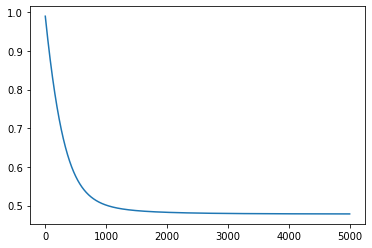

In [436]:
plt.plot(cost_history)
cost_history[4999]

In [438]:
confusion_matrix = confusion_matrix(y_test_l, y_predl)
print(confusion_matrix)

[[29601  6605]
 [ 7052 29222]]


In [111]:
y_predl

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [439]:
y_pred_tr=predict(X_train_l,params_optimal)
#y_pred_tr = np.round(np.matmul(X_train_l,params_optimal))
#y_pred_tr.shape

In [113]:
len(y_pred_tr)

169120

In [440]:
#y_pred_tr = np.matmul(X_train_l,params_optimal)
from sklearn.metrics import confusion_matrix
confusion_matrix = (confusion_matrix(y_train_l, y_pred_tr))
print(confusion_matrix)

[[68805 15790]
 [16491 68034]]


C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


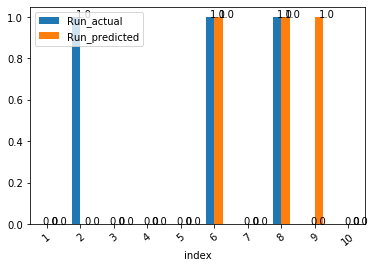

In [691]:
#Plotting y_hat and y_pred
y_data = np.concatenate((y_test_l, y_predl), axis=1)
y_data = pd.DataFrame(y_data)
y_data.columns = ["Run_actual","Run_predicted"]
y_data_plot = y_data.head(10)
y_data_plot["index"] = range(1,11)
fig, ax = plt.subplots()
y_data_plot.plot.bar(x = 'index', y = ['Run_actual', 'Run_predicted'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

## Experiment 1

#### Ques : Experiment with various parameters for linear and logistic regression (e.g. learning rate ∝) and report on your findings as how the error/accuracy varies for train and test sets with varying these parameters. Plot the results. Report the best values of the parameters.

### Linear Regression

### Case 1: Above case :  alpha = .001  total =3000 explained_variance:  0.3967 r2:  0.3967 MAE:   0.4665 MSE:  0.5964 RMSE of the function: 0.7723 RMSE of inbuilt model : 0.7645157928830532, cost converging at : 0.21

### Case2: When we look at the p-value we can see that x12 which is STRN is not significant with p-value 0.987. Therefore we will build a model by removing this variable and then check the results.

In [441]:
#Function for converting the independent variables dataset into a datframe and doing manipulations
def manu_data(dataset):
    x_ind = pd.DataFrame(dataset)
    x_ind.columns = ["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI","VWM","VWN","STRM","STRN","SA","SB","constant"]
    return x_ind

In [442]:
#Dropping column STRN from the dataset
x_ind=manu_data(x)
x_mod = x_ind.drop(columns=['STRN'])
#Converting it into an array
x_mod=np.array(x_mod)
#Splitting the data
X_train, X_test, y_train, y_test=train_test_split(x_mod, run, train_size=0.70,test_size=0.30, random_state=100)

In [443]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [445]:
#generating theta
theta_e=theta_gen(X_train)

In [446]:
#Finding cost and thetas
alpha = .001 
total =5000
finalj1 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e1 = finalj1[1]
theta_e1 = finalj1[0]

In [448]:
print(theta_e1)
#Converging point
print("Cost is :" ,cost_e1[4999])

[[ 0.36057762]
 [ 0.26788914]
 [ 0.07002085]
 [-0.27338809]
 [-0.2461213 ]
 [-0.00167938]
 [ 0.05300984]
 [ 0.03198866]
 [ 0.01881344]
 [ 0.08674441]
 [ 0.00807217]
 [ 0.07623254]
 [ 0.07957535]
 [ 0.83438636]]
Cost is : [0.21534475]


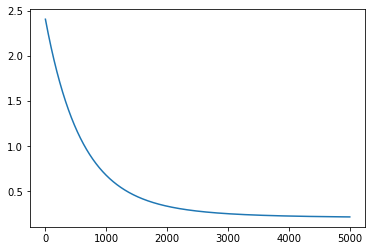

In [450]:
#plotting the cost
plt.plot(cost_e1)

In [451]:
#Inbuilt regression values
pred = sm.OLS(y_train, X_train)
pred2 = pred.fit()
print(pred2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.407
Model:                            OLS   Adj. R-squared (uncentered):              0.407
Method:                 Least Squares   F-statistic:                              8924.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:13:39   Log-Likelihood:                     -1.9580e+05
No. Observations:              169120   AIC:                                  3.916e+05
Df Residuals:                  169107   BIC:                                  3.918e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\ikapo\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\ikapo\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ikapo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ikapo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ikapo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [456]:
#Calculating all parameters
ypred1=predict_f(X_test,theta_e1)
regression_results(y_test, ypred1)

explained_variance:  0.3862
r2:  0.3862
MAE:  0.4679
MSE:  0.6138
RMSE:  0.7835


##### We can see that as we removed one variable, all the variables are almost the same, R2, RMSE, not much difference, alpha = 0.001, Iteration = 5000 explained_variance:  0.4071 r2:  0.4071 MAE:  0.4728 MSE:  0.5862 RMSE:  0.7656, converging cost : 0.20918236

### Case 3 : Changing the value of alpha to 0.01 and iterations to 6000

In [ ]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [314]:
alpha = .01 
total =6000
finalj2 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e2 = finalj2[1]
theta_e2 = finalj2[0]

In [316]:
print(theta_e2)
#Converging point
print("Cost is :" ,cost_e2[5999])

[[ 0.38187538]
 [ 0.35497854]
 [ 0.11151419]
 [-0.35564727]
 [-0.35067908]
 [ 0.02715043]
 [ 0.02846448]
 [ 0.03223792]
 [-0.00593447]
 [-0.0165857 ]
 [-0.01183808]
 [ 0.05227514]
 [ 0.06488974]
 [ 0.00067155]]
Cost is : [0.20859945]


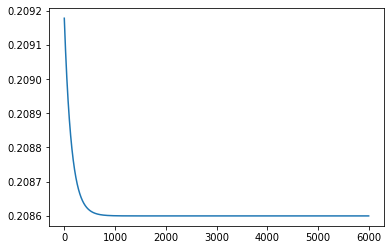

In [317]:
#plotting the cost
plt.plot(cost_e2)

In [318]:
ypred2=predict_f(X_test,theta_e2)
print(regression_results(y_test, ypred2))
print(regression_results(y_test, ypred2))

explained_variance:  0.4088
r2:  0.4088
MAE:  0.4763
MSE:  0.5845
RMSE:  0.7645


In [320]:
#RMSE calculated using inbuilt function and inbuilt values of reg
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred_2 = regressor.predict(X_test)
error = y_pred_2-y_test
math.sqrt(sum(error*error)/len(error))

0.7645157928830532

C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


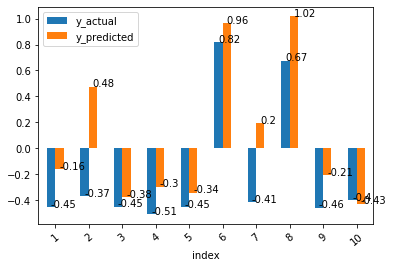

In [419]:
#Plotting y_hat and y_pred
y_data_lin = np.concatenate((y_test, ypred2), axis=1)
y_data_lin = pd.DataFrame(y_data_lin)
y_data_lin.columns = ["y_actual","y_predicted"]
y_data_lin_plot = y_data_lin.head(10)
y_data_lin_plot["index"] = range(1,11)
fig, ax = plt.subplots()
y_data_lin_plot.plot.bar(x = 'index', y = ['y_actual', 'y_predicted'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

#### We can see that as we removed one variable, all the variables are almost the same, R2, RMSE, not much difference, alpha = 0.01, Iteration = 6000 explained_variance:  0.4088 r2:  0.4088(slight improv) MAE:  0.4763 MSE:  0.5845 RMSE:  0.7645, matches with the RMSE we get from the inbuilt function, converging cost : 0.20859945

### Case 4 : Running for a few more alphas but having all the variables

In [496]:
#Having all the data and independent variables
X_train, X_test, y_train, y_test=train_test_split(x, run, train_size=0.70,test_size=0.30, random_state=100)

In [497]:
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

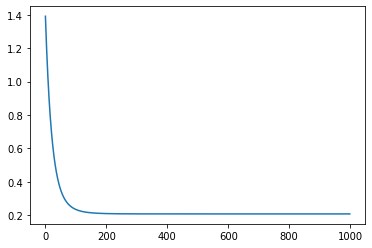

In [466]:
alpha = 0.03
total =1000
theta_e=theta_gen(X_train)
finalj3 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e3 = finalj3[1]
theta_e3 = finalj3[0]
plt.plot(cost_e3)

In [467]:
ypred3=predict_f(X_test,theta_e3)
regression_results(y_test, ypred3)

explained_variance:  0.4088
r2:  0.4088
MAE:  0.4771
MSE:  0.5912
RMSE:  0.7689


In [468]:
xy = np.matmul(X_train,theta_e3)
regression_results(y_train, xy)

explained_variance:  0.4069
r2:  0.4069
MAE:  0.4786
MSE:  0.5931
RMSE:  0.7701


In [471]:
cost_e3[784]

array([0.20758648])

In [ ]:
alpha = 0.8
total =1000
theta_e=theta_gen(X_train)
finalj4= gradesc(X_train, y_train, theta_e, alpha, total)
cost_e4= finalj4[1]
theta_e4 = finalj4[0]
plt.plot(cost_e4)

In [500]:
theta_e4

array([[ 3.80802924e-01],
       [ 3.54272185e-01],
       [ 1.11256698e-01],
       [-3.55733697e-01],
       [-3.49994506e-01],
       [ 2.71090123e-02],
       [ 2.84018026e-02],
       [ 3.21595213e-02],
       [-5.91747523e-03],
       [-1.65052862e-02],
       [-1.18092787e-02],
       [ 3.12673399e-05],
       [ 5.21480663e-02],
       [ 6.47319695e-02],
       [ 8.97653820e-01]])

In [507]:
ypred5=predict_f(X_test,theta_e4)
regression_results(y_test, ypred5)

explained_variance:  0.4088
r2:  0.4088
MAE:  0.4771
MSE:  0.5912
RMSE:  0.7689


In [503]:
xy1 = np.matmul(X_train,theta_e4)
regression_results(y_train, xy1)

explained_variance:  0.4069
r2:  0.4069
MAE:  0.4786
MSE:  0.5931
RMSE:  0.7701


In [506]:
cost_e4[24]

array([0.20758649])

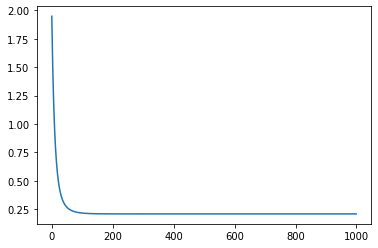

In [66]:
alpha = 0.05
total =1000
theta_e=theta_gen(X_train)
finalj5 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e5 = finalj5[1]
theta_e5 = finalj5[0]
plt.plot(cost_e5)

In [67]:
ypred5=predict_f(X_test,theta_e5)
regression_results(y_test, ypred5)

explained_variance:  0.4088
r2:  0.4088
MAE:  0.4763
MSE:  0.5845
RMSE:  0.7645


In [68]:
xy1 = np.matmul(X_train,theta_e5)
regression_results(y_train, xy1)

explained_variance:  0.4069
r2:  0.4069
MAE:  0.4796
MSE:  0.596
RMSE:  0.772


In [738]:
cost_e5[477]

array([0.20859945])

### Logistic Regression

#### Logistic doesn't have any insignificant variables so, we will change the alpha value and check the converging points

##### Case 1 : alpha = 0.01, iteration = 5000, converging point = 0.47879172

#### Case 2: CHeck for alpha = 0.1 and iteration = 8000

In [473]:
X_train_l, X_test_l, y_train_l, y_test_l=train_test_split(x, runs2, train_size=0.70,test_size=0.30, random_state=100)

In [475]:
X_train_l=norm(X_train_l)
X_test_l=norm(X_test_l)
y_train_l=norm(y_train_l)
y_test_l=norm(y_test_l)

In [136]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 8000
learning_rate = 0.1
initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history1, params_optimal1) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred_l1 = predict(X_test_l, params_optimal1)

[[ 1.30945044]
 [ 0.84778212]
 [ 0.15339636]
 [-0.89257938]
 [-0.76810686]
 [-0.0463098 ]
 [-0.06929998]
 [-0.02034041]
 [-0.07780992]
 [-0.14953631]
 [-0.32257686]
 [-0.02305719]
 [-0.4053967 ]
 [-0.0810245 ]
 [ 0.00499033]]


array([0.47847361])

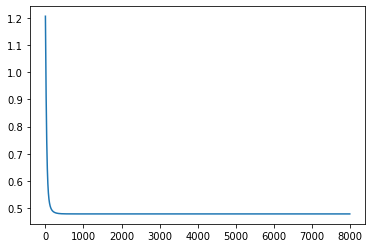

In [780]:
y_pred_l1 = predict(X_test_l, params_optimal1)
print(params_optimal1)
plt.plot(cost_history1)
cost_history1[1678]

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test_l, y_pred_l1)
print(confusion_matrix1)

[[29486  6720]
 [ 6988 29286]]


In [150]:
params_optimal1.shape

(15, 1)

In [154]:
from sklearn.metrics import confusion_matrix
y_pred_tr11=predict(X_train_l,params_optimal1)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr11)
print(confusion_matrix1)

[[68726 15869]
 [16479 68046]]


##### Converging point = 0.47847361

#### Case 3: CHeck for alpha = 0.5 and iteration = 15000

[[ 1.30945044]
 [ 0.84778212]
 [ 0.15339636]
 [-0.89257938]
 [-0.76810686]
 [-0.0463098 ]
 [-0.06929998]
 [-0.02034041]
 [-0.07780992]
 [-0.14953631]
 [-0.32257686]
 [-0.02305719]
 [-0.4053967 ]
 [-0.0810245 ]
 [ 0.00499033]]


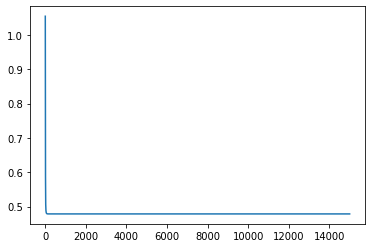

In [155]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 15000
learning_rate = 0.5

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history2, params_optimal2) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred_l2 = predict(X_test_l, params_optimal2)
print(params_optimal2)
plt.plot(cost_history2)

In [160]:
cost_history2[325]

array([0.47847361])

In [828]:
params_optimal2

array([[ 1.30945044],
       [ 0.84778212],
       [ 0.15339636],
       [-0.89257938],
       [-0.76810686],
       [-0.0463098 ],
       [-0.06929998],
       [-0.02034041],
       [-0.07780992],
       [-0.14953631],
       [-0.32257686],
       [-0.02305719],
       [-0.4053967 ],
       [-0.0810245 ],
       [ 0.00499033]])

C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


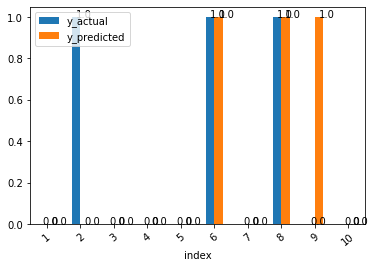

In [538]:
#Plotting y_hat and y_pred
y_data = np.concatenate((y_test_l, y_pred_l2), axis=1)
y_data = pd.DataFrame(y_data)
y_data.columns = ["y_actual","y_predicted"]
y_data_plot = y_data.head(10)
y_data_plot["index"] = range(1,11)
fig, ax = plt.subplots()
y_data_plot.plot.bar(x = 'index', y = ['y_actual', 'y_predicted'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

In [539]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test_l, y_pred_l2)
print(confusion_matrix2)

[[29486  6720]
 [ 6988 29286]]


In [161]:
from sklearn.metrics import confusion_matrix
y_pred_tr12=predict(X_train_l,params_optimal2)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr12)
print(confusion_matrix1)

[[68726 15869]
 [16479 68046]]


In [540]:
cost_history2[14999]

array([0.47847361])

#### We see no change in the cost

### Running for a few more alphas

[[ 1.30945044]
 [ 0.84778212]
 [ 0.15339636]
 [-0.89257938]
 [-0.76810686]
 [-0.0463098 ]
 [-0.06929998]
 [-0.02034041]
 [-0.07780992]
 [-0.14953631]
 [-0.32257686]
 [-0.02305719]
 [-0.4053967 ]
 [-0.0810245 ]
 [ 0.00499033]]


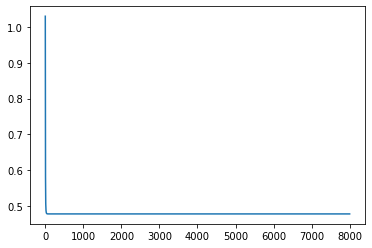

In [541]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 8000
learning_rate = 1
initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history3, params_optimal3) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred_l3 = predict(X_test_l, params_optimal3)
print(params_optimal3)
plt.plot(cost_history3)

[[ 1.30945036]
 [ 0.84778207]
 [ 0.15339634]
 [-0.89257932]
 [-0.7681068 ]
 [-0.04630979]
 [-0.06929998]
 [-0.02034041]
 [-0.07780989]
 [-0.14953628]
 [-0.32257685]
 [-0.02305718]
 [-0.40539668]
 [-0.0810245 ]
 [ 0.00499032]]


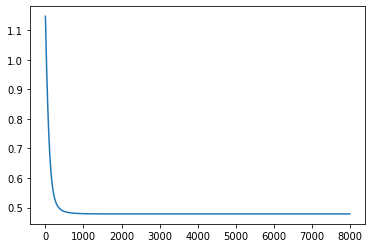

In [162]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 8000
learning_rate = 0.04
initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history4, params_optimal4) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred_l4 = predict(X_test_l, params_optimal4)
print(params_optimal4)
plt.plot(cost_history4)

In [827]:
cost_history4[4196]

array([0.47847361])

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test_l, y_pred_l4)
print(confusion_matrix2)

[[29486  6720]
 [ 6988 29286]]


In [164]:
from sklearn.metrics import confusion_matrix
y_pred_tr14=predict(X_train_l,params_optimal4)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr14)
print(confusion_matrix1)

[[68726 15869]
 [16479 68046]]


[[0.10176416]
 [0.79174983]
 [0.33455732]
 [0.46929392]
 [0.67171022]
 [0.64888458]
 [0.37010395]
 [0.25339714]
 [0.29058409]
 [0.21269305]
 [0.42089788]
 [0.87804735]
 [0.85642646]
 [0.96186093]
 [0.29200653]]


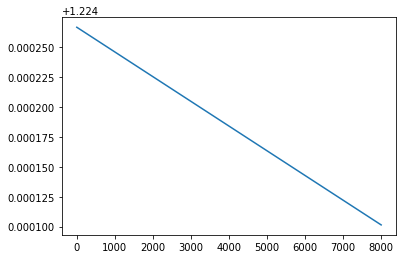

In [801]:
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 8000
learning_rate = 0.0000001
initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history5, params_optimal5) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_pred_l5 = predict(X_test_l, params_optimal5)
print(params_optimal5)
plt.plot(cost_history5)

## Experiment 3

#### Dropping 8 random features :'KWI',"VWN","VWM","MWG","KWG","SB"

### For Linear Regression

In [476]:
x_mod_1 = x_ind.drop(columns=['KWI',"VWN","VWM","MWG","KWG","SB"])
x_mod_1
#Converting it into an array
x_mod_1=np.array(x_mod_1)
#Splitting the data
X_train, X_test, y_train, y_test=train_test_split(x_mod_1, run, train_size=0.70,test_size=0.30, random_state=100)

In [477]:
#Normalising the data
X_train=norm(X_train)
X_test=norm(X_test)
y_train=norm(y_train)
y_test=norm(y_test)

In [188]:
#generating theta
theta_e=theta_gen(X_train)
#Finding cost and thetas
alpha = .001 
total =5000
finalj1_8 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e1_8 = finalj1_8[1]
theta_e1_8 = finalj1_8[0]

array([0.21555041])

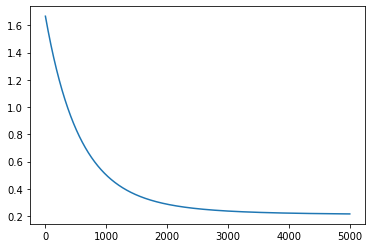

In [508]:
#plotting the cost
plt.plot(cost_e1_8)
cost_e1_8[4999]

In [509]:
#Inbuilt regression values
pred_8 = sm.OLS(y_train, X_train)
pred_8 = pred_8.fit()
print(pred_8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 1.407e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:48:53   Log-Likelihood:            -1.9725e+05
No. Observations:              169120   AIC:                         3.945e+05
Df Residuals:                  169111   BIC:                         3.946e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3796      0.002    197.774      0.0

In [510]:
#RMSE calculated using inbuilt function and inbuilt values of reg
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred_8 = regressor.predict(X_test)
error = y_pred_8-y_test
math.sqrt(sum(error*error)/len(error))

0.7689901649839674

In [189]:
ypred_8l=predict_f(X_test,theta_e1_8)
regression_results(y_test, ypred_8l)

explained_variance:  0.2351
r2:  0.2351
MAE:  0.5105
MSE:  0.7562
RMSE:  0.8696


In [190]:
ypred_8l_tr=predict_f(X_train,theta_e1_8)
regression_results(y_train, ypred_8l_tr)

explained_variance:  0.2369
r2:  0.2369
MAE:  0.5103
MSE:  0.7669
RMSE:  0.8757


C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


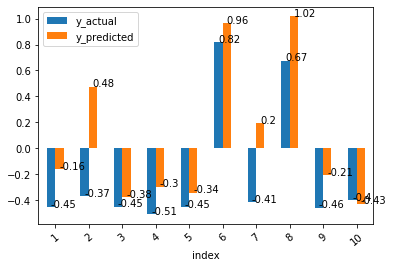

In [511]:
#Plotting y_hat and y_pred
y_data_lin = np.concatenate((y_test, ypred2), axis=1)
y_data_lin = pd.DataFrame(y_data_lin)
y_data_lin.columns = ["y_actual","y_predicted"]
y_data_lin_plot = y_data_lin.head(10)
y_data_lin_plot["index"] = range(1,11)
fig, ax = plt.subplots()
y_data_lin_plot.plot.bar(x = 'index', y = ['y_actual', 'y_predicted'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

#### Based on the results : RMSE has increased, also, cost convergence point has increased. So, after selecting 8 randon variables, there was no improvement in the cost value. (All the results in the report.)

### For Logistic Regression

[[ 0.59360061]
 [-0.56861214]
 [-0.54175761]
 [ 0.1208924 ]
 [-0.03862995]
 [-0.24469518]
 [-0.01344074]
 [-0.30373959]
 [-0.00669534]]


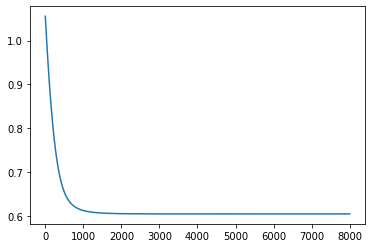

In [167]:
m = len(runs)
n = np.size(X_train,1)
params = np.random.rand(n,1) #betas
total = 8000
learning_rate = 0.01
initial_cost = compute_cost(X_train, y_train_l, params)
(cost_history1_8, params_optimal1_8) = gradient_descent(X_train, y_train_l, params, learning_rate, total)
y_pred_l1_8 = predict(X_test, params_optimal1_8)
print(params_optimal1_8)
plt.plot(cost_history1_8)

In [843]:
cost_history1_8[7999]

array([0.4906456])

C:\Users\ikapo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


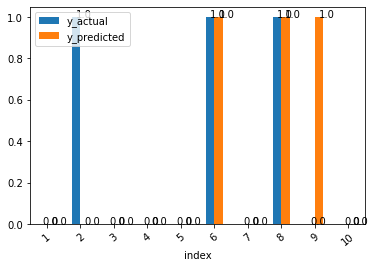

In [837]:
#Plotting y_hat and y_pred
y_data_8 = np.concatenate((y_test_l, y_pred_l1_8), axis=1)
y_data_8 = pd.DataFrame(y_data_8)
y_data_8.columns = ["y_actual","y_predicted"]
y_data_plot_8 = y_data_8.head(10)
y_data_plot_8["index"] = range(1,11)
fig, ax = plt.subplots()
y_data_plot_8.plot.bar(x = 'index', y = ['y_actual', 'y_predicted'], rot = 40, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

In [838]:
#checking from the inbuilt function
import statsmodels.api as sm
logit_model=sm.Logit(y_train_l,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.478500
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.310      
Dependent Variable: y                AIC:              161877.9255
Date:               2020-02-11 15:03 BIC:              162028.5010
No. Observations:   169120           Log-Likelihood:   -80924.    
Df Model:           14               LL-Null:          -1.1723e+05
Df Residuals:       169105           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        1.3095     0.0079    166.0315   0.0000    1.2940    1.3249
x2        0.8478     0.0073    115.3554   0.0

In [848]:
confusion_matrix8 = confusion_matrix(y_test_l, y_pred_l1_8)
print(confusion_matrix8)
#Accuracy : 67.7%

[[24546 11660]
 [11622 24652]]


In [170]:
X_train_l.shape

(169120, 15)

In [171]:
from sklearn.metrics import confusion_matrix
y_pred_tr18=predict(X_train,params_optimal1_8)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr18)
print(confusion_matrix1)

[[57721 26874]
 [27383 57142]]


## Experiment 4

In [178]:
runtime_up = runtime.drop(columns=["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"])

In [179]:
corr = runtime_up.corr()
corr.style.background_gradient(cmap='viridis').set_precision(2)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,runavg (ms)
MWG,1,0.0006,0.0093,0.11,-0.0086,0.16,0.015,1.5e-19,0.35,-0.00084,6.9e-21,1.4e-21,0,0,0.35
NWG,0.0006,1,0.0093,-0.0086,0.11,0.015,0.16,8.6e-19,-0.00084,0.35,6.9e-21,1.4e-21,0,0,0.32
KWG,0.0093,0.0093,1,0.15,0.15,-0.035,-0.035,-1.8e-19,-0.012,-0.012,1.9e-21,0,0,0,0.011
MDIMC,0.11,-0.0086,0.15,1,-0.21,0.2,0.085,-3.2e-18,-0.13,0.011,-1.1e-20,-3.7e-21,0,0,-0.22
NDIMC,-0.0086,0.11,0.15,-0.21,1,0.085,0.2,-5.3e-18,0.011,-0.13,-1.1e-20,-3.7e-21,0,0,-0.21
MDIMA,0.16,0.015,-0.035,0.2,0.085,1,0.088,-4.6e-18,-0.2,-0.019,1.6e-21,1.6e-21,0,0,-0.007
NDIMB,0.015,0.16,-0.035,0.085,0.2,0.088,1,-1.1e-17,-0.019,-0.2,1.6e-21,1.6e-21,0,0,-0.0087
KWI,1.5e-19,8.6e-19,-1.8e-19,-3.2e-18,-5.3e-18,-4.6e-18,-1.1e-17,1,-3.6e-16,-4.8e-16,0,0,0,0,0.033
VWM,0.35,-0.00084,-0.012,-0.13,0.011,-0.2,-0.019,-3.6e-16,1,0.0012,-1.4e-20,9.4e-22,0,0,0.16
VWN,-0.00084,0.35,-0.012,0.011,-0.13,-0.019,-0.2,-4.8e-16,0.0012,1,-1.4e-20,9.4e-22,0,0,0.14


#### Based on correlation, the variables having the least correlation with run, are being dropped

In [180]:
x_mod_2 = x_ind.drop(columns=["MDIMA","NDIMB","KWG","KWI","STRM","STRN"])
x_mod_2
#Converting it into an array
x_mod_2=np.array(x_mod_2)
#Splitting the data
X_train, X_test, y_train, y_test=train_test_split(x_mod_2, run, train_size=0.70,test_size=0.30, random_state=100)

In [ ]:
#Normalising the data
X_train=norm(X_train)
X_test=norm(X_test)

### For Linear Regression 

In [181]:
#generating theta
theta_e=theta_gen(X_train)
#Finding cost and thetas
alpha = .001 
total =5000
finalj1_9 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e1_9 = finalj1_9[1]
theta_e1_9 = finalj1_9[0]

array([0.2183185])

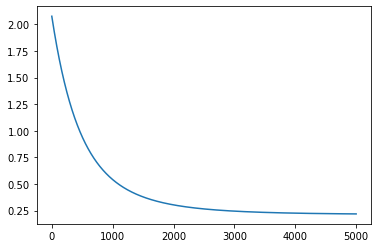

In [182]:
#plotting the cost
plt.plot(cost_e1_9)
cost_e1_9[4999]

In [183]:
#Inbuilt regression values
pred_9 = sm.OLS(y_train, X_train)
pred_9 = pred_9.fit()
print(pred_9.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.373e+04
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        23:15:51   Log-Likelihood:            -1.9807e+05
No. Observations:              169120   AIC:                         3.962e+05
Df Residuals:                  169111   BIC:                         3.963e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3868      0.002    187.813      0.0

In [184]:
ypred_9l=predict_f(X_test,theta_e1_9)
regression_results(y_test, ypred_9l)

explained_variance:  0.38
r2:  0.3799
MAE:  0.4632
MSE:  0.613
RMSE:  0.7829


In [185]:
ypred_9trl=predict_f(X_train,theta_e1_9)
regression_results(y_train, ypred_9trl)

explained_variance:  0.3793
r2:  0.3793
MAE:  0.4662
MSE:  0.6238
RMSE:  0.7898


### For Logistic Regression

[[ 1.25582952]
 [ 0.80265174]
 [-0.84924691]
 [-0.73015531]
 [-0.05735011]
 [-0.12202087]
 [-0.39336502]
 [-0.07881305]
 [ 0.00402685]]


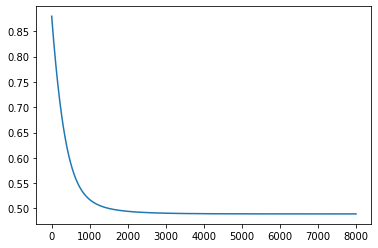

In [174]:
m = len(runs)
n = np.size(X_train,1)
params = np.random.rand(n,1) #betas
total = 8000
learning_rate = 0.01
initial_cost = compute_cost(X_train, y_train_l, params)
(cost_history1_10, params_optimal1_10) = gradient_descent(X_train, y_train_l, params, learning_rate, total)
y_pred_l1_10 = predict(X_test, params_optimal1_10)
print(params_optimal1_10)
plt.plot(cost_history1_10)

In [39]:
cost_history1_10[7999]

array([0.4891569])

In [37]:
confusion_matrix10 = confusion_matrix(y_test_l, y_pred_l1_10)
print(confusion_matrix10)
#Accuracy = 80.5(29181/(29181+7025))

[[29181  7025]
 [ 6790 29484]]


In [177]:
from sklearn.metrics import confusion_matrix
y_pred_tr10=predict(X_train,params_optimal1_10)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr10)
print(confusion_matrix1)

[[68293 16302]
 [16073 68452]]


## Experiment 2

### Linear Regression

#### Setting the threshold value at 0.000001

In [276]:
#Setting up the Cost function
#Here x is the independent variable, y is the dependent variable and theta is the randomly generated numbers
def Cost(x,y,theta):
    m=len(runtime.axes[0])
    the1 = np.matmul(x,theta)
    Cost1=sum(np.subtract((the1),y)**2)
    Cost=Cost1/(2*m)
    return(Cost)  

In [277]:
#Implementing gradient Descent function
def gradesc(x,y,theta,alpha,total):
    m=len(runtime.axes[0])
    xt = x.transpose()
    j=[0]*total
    for i in range(total):
            the2 =(np.matmul(x,theta))-y        
            the3=np.matmul(x.transpose(),the2)
            theta = theta - alpha*(1/m)*the3
            theta0=theta[-1]
            j[i] = Cost(x,y,theta)
            #print (i, j[i])
            if (abs((j[i-1]-j[i]))<thresh):
                print(i,j[i])
                break
    finalj=(theta, j)
    return(finalj)

##### thresh = 10**(-3)

In [253]:
thresh = 0.001
theta_e=theta_gen(X_train)
#Finding cost and thetas
alpha = .001 
total=5000
finalj1_22 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e1_22 = finalj1_22[1]
theta_e1_22 = finalj1_22[0]

792 [0.84283654]


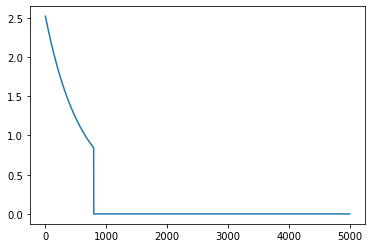

In [255]:
plt.plot(cost_e1_22)

In [257]:
#Test Error
ypred_l_22=predict_f(X_test,theta_e1_22)
regression_results(y_test, ypred_l_22)

explained_variance:  -1.4153
r2:  -1.4235
MAE:  1.2269
MSE:  2.3959
RMSE:  1.5479


In [258]:
#Train Error
ypred_tr_22=predict_f(X_train,theta_e1_22)
regression_results(y_train, ypred_tr_22)

explained_variance:  -1.3634
r2:  -1.3717
MAE:  1.2247
MSE:  2.3833
RMSE:  1.5438


#### thresh =0.002

In [261]:
thresh =0.002
theta_e=theta_gen(X_train)
#Finding cost and thetas
alpha = .001 
total=5000
finalj1_224 = gradesc(X_train, y_train, theta_e, alpha, total)
cost_e1_224 = finalj1_224[1]
theta_e1_224 = finalj1_224[0]

230 [1.43051708]


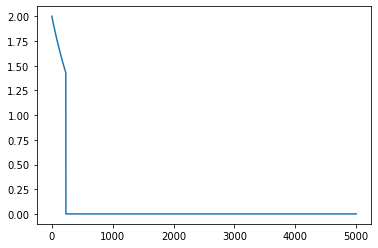

In [264]:
plt.plot(cost_e1_224)

In [266]:
#Test Error
ypred_l_24=predict_f(X_test,theta_e1_224)
regression_results(y_test, ypred_l_24)

explained_variance:  -2.8445
r2:  -2.9217
MAE:  1.5649
MSE:  3.8771
RMSE:  1.969


In [265]:
#Train Error
ypred_tr_24=predict_f(X_train,theta_e1_224)
regression_results(y_train, ypred_tr_24)

explained_variance:  -2.7558
r2:  -2.834
MAE:  1.5592
MSE:  3.8527
RMSE:  1.9628


In [58]:
#Setting up the Cost function
#Here x is the independent variable, y is the dependent variable and theta is the randomly generated numbers

def Cost(x,y,theta):
    m=len(runtime.axes[0])
    the1 = np.matmul(x,theta)
    Cost1=sum(np.subtract((the1),y)**2)
    Cost=Cost1/(2*m)
    return(Cost)  

In [59]:
def gradesc_e2(x,y,theta,alpha,total,threshold):
    m=len(runtime.axes[0])
    xt = x.transpose()
    j=[0]*total
    finalj=[]
    for i in range(total):
        x_theta = x@theta
        the2 = x_theta - y
        the3=xt @ the2
        theta = theta - alpha*(1/m)*the3
        j[i] = Cost(X_train, y_train,theta)
        if i > 1 and (j[i-1][0]-j[i][0])< threshold:
            break
    finalj=(theta, j, alpha, threshold, i)
    return(finalj)

In [61]:
thresholds = [10**-i for i in range(2,7)]
alphas = [0.01]
results_e2 = []
thetas_e2 = []
x = np.array(X_train)
y = np.array(y_train)
iterations = 50000
for threshold in thresholds:
    for alpha in alphas:
        theta_e2 = np.random.rand(x.shape[1],1)
        results_e2.append(gradesc_e2(X_train,y_train,theta_e2,alpha, iterations, threshold))
        print("threshold = {} , alpha = {}  and iterations = {}".format(threshold, alpha, results_e2[len(results_e2) - 1][4]))

threshold = 0.01 , alpha = 0.01  and iterations = 58
threshold = 0.001 , alpha = 0.01  and iterations = 209
threshold = 0.0001 , alpha = 0.01  and iterations = 368
threshold = 1e-05 , alpha = 0.01  and iterations = 601
threshold = 1e-06 , alpha = 0.01  and iterations = 1002


In [65]:
result_df = pd.DataFrame(columns = (["threshold", "alpha", "final cost", "iterations",'const', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']))
print(result_df)
for i in range(0,len(results_e2)):
    result_df.loc[i] = [results_e2[i][3], results_e2[i][2], results_e2[i][1][-1], results_e2[i][4]] + [results_e2[i][0][j][0] for j in range(0,15)] 
result_df.head()

Empty DataFrame
Columns: [threshold, alpha, final cost, iterations, const, MWG, NWG, KWG, MDIMC, NDIMC, MDIMA, NDIMB, KWI, VWM, VWN, STRM, STRN, SA, SB]
Index: []


,threshold,alpha,final cost,iterations,const,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,0.010000,0.01,0.0,58.0,0.245837,0.671705,-0.042739,0.475193,0.504475,0.437768,0.000228,0.526177,0.274056,0.106794,0.055984,0.155820,0.428005,0.238298,0.183839
1,0.001000,0.01,0.0,209.0,0.320110,0.226597,0.184530,-0.241956,-0.199587,0.120524,0.079840,0.053131,0.079510,0.212395,0.185969,0.227751,0.228225,0.168078,0.789740
2,0.000100,0.01,0.0,368.0,0.329258,0.281787,0.071914,-0.282896,-0.258258,0.051611,0.052798,0.097699,0.069585,0.065616,0.006209,0.016874,0.104029,0.099240,0.246393
3,0.000010,0.01,0.0,601.0,0.358710,0.314120,0.111645,-0.336398,-0.328230,0.031541,0.051439,0.038610,0.020216,0.029632,0.002363,0.002794,0.055577,0.066437,0.404511
4,0.000001,0.01,0.0,1002.0,0.382170,0.339966,0.105219,-0.347402,-0.337365,0.020446,0.032917,0.032961,-0.007289,-0.001497,-0.011602,0.000305,0.052402,0.064996,0.830318


In [66]:
def possibilities(x, y, results_df):
    x = np.asarray(x)
    y = np.asarray(y).T
    m_matrix = np.asarray(results_df.iloc[:,4:])
    prop = result_df.iloc[:,0:4]
    y_hat_all = m_matrix@x.T
    err = y-y_hat_all
    err_all = (np.sum(err**2, axis = 1)/len(x)).reshape([-1,1])
    print(err_all.shape)
    final_err_prop = pd.concat([prop, pd.DataFrame(err_all)], axis = 1, ignore_index=True)
    final_err_prop.columns = ["threshold", "alpha", "final cost", "iterations","RMSE"]
    return final_err_prop

In [69]:
final_errors_properties = possibilities(X_train, y_train, result_df)
final_errors_properties_test = possibilities(X_test, y_test, result_df)

(5, 1)
(5, 1)


In [70]:
final_errors_properties_filtered = final_errors_properties[final_errors_properties["threshold"] < 0.1]
final_errors_properties_filtered_test = final_errors_properties_test[final_errors_properties_test["threshold"] < 0.1]

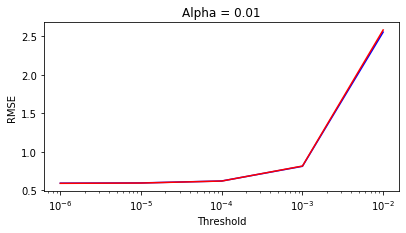

In [71]:
import pylab

fig = plt.figure(figsize = [14,18])
j = 1
for alpha in alphas:
    final_errors_properties_curr = final_errors_properties_filtered[final_errors_properties_filtered["alpha"] == alpha]
    final_errors_properties_curr_test = final_errors_properties_filtered_test[final_errors_properties_filtered_test["alpha"] == alpha]
    ax = fig.add_subplot(5,2, j)
    line, = ax.plot(final_errors_properties_curr['threshold'], final_errors_properties_curr['RMSE'], color='blue')
    line2, = ax.plot(final_errors_properties_curr_test['threshold'], final_errors_properties_curr_test['RMSE'], color='red')
    j = j + 1
    ax.set_xscale('log')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('RMSE')
    ax.set_title('Alpha = {}'.format(alpha))

### Logistic Regression

In [529]:
#Gradient descent
def gradient_descent(X, y, params, alpha, total):
    m = len(y)
    cost_history = np.zeros((total,1))

    for i in range(total):
        params = params - (alpha/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
        if (abs((cost_history[i-1]-cost_history[i]))<thresh):
                print(i,cost_history[i])
                break
    return (cost_history, params)

In [274]:
thresh = 0.0005
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.01

initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history, params_optimal) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_predl = predict(X_test_l, params_optimal)

324 [0.6712852]


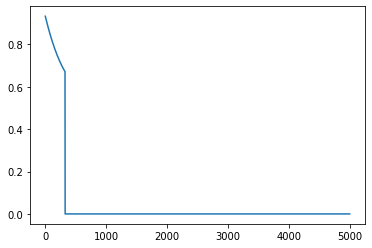

In [275]:
plt.plot(cost_history)

In [283]:
confusion_matrix10 = confusion_matrix(y_test_l, y_predl)
print(confusion_matrix10)
#53.7

[[19466 16740]
 [ 9821 26453]]


In [285]:
from sklearn.metrics import confusion_matrix
y_pred_tr10=predict(X_train,params_optimal)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr10)
print(confusion_matrix1)
53.6

[[45313 39282]
 [22995 61530]]


In [284]:
X_train.shape

(169120, 15)

In [530]:
thresh = 0.00009
m = len(runs)
n = np.size(x,1)
params = np.random.rand(n,1) #betas
total = 5000
learning_rate = 0.01
initial_cost = compute_cost(X_train_l, y_train_l, params)
(cost_history1, params_optimal1) = gradient_descent(X_train_l, y_train_l, params, learning_rate, total)
y_predl1 = predict(X_test_l, params_optimal1)

952 [0.51622871]


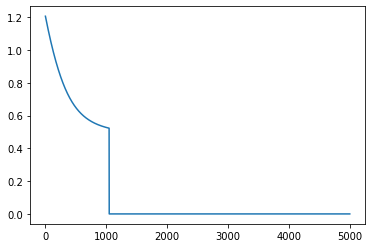

In [286]:
plt.plot(cost_history1)

In [531]:
confusion_matrix10 = confusion_matrix(y_test_l, y_predl1)
print(confusion_matrix10)
#80.1

[[29030  7176]
 [ 7839 28435]]


In [542]:
from sklearn.metrics import confusion_matrix
y_pred_tr10=predict(X_train_l,params_optimal1)
confusion_matrix1 = confusion_matrix(y_train_l, y_pred_tr10)
print(confusion_matrix1)
#80.2

[[67858 16737]
 [18287 66238]]


# ----------------------------------THE END------------------------------------------